# Large Data CNN

In [1]:
import keras.layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from analytics.PhishX.Modeling.build-convolutions import process_urls

plt.style.use('ggplot')
plt.rc('patch', force_edgecolor=True,edgecolor='white')
plt.rc('hist', bins='auto')

In [2]:
%%time
conv = pd.read_csv('conv_7997_68_256')
conv.drop(columns=['Unnamed: 0'], inplace=True)
conv

CPU times: user 1min 10s, sys: 2.16 s, total: 1min 12s
Wall time: 1min 12s


,0,1,2,3,4,5,6,7,8,9,...,17398,17399,17400,17401,17402,17403,17404,17405,17406,17407
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = pd.read_csv('pre_conv_df_7997')
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Label'] = np.asarray(df['Label']).astype(np.float32)
df

,index,URL,Label
0,0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1.0
1,1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1.0
2,2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1.0
3,3,mail.printakid.com/www.online.americanexpress....,1.0
4,4,thewhiskeydregs.com/wp-content/themes/widescre...,1.0
...,...,...,...
7992,51899,www.citiescommerce.com/consult.htm,0.0
7993,51900,www.corporatewebbing.com/default.asp,0.0
7994,51901,www.marinade.ltd.uk/2003/home.shtml,0.0
7995,51902,axionnet.tripod.com/index.html,0.0


In [4]:
data = conv.values
data = np.asarray(data).astype(np.float32)
data = data.reshape((7997, 68, 256))
data.shape

(7997, 68, 256)

In [5]:
pos_df = data[:3000, :, :]
neg_df = data[-3000:, :, :]

X_train = np.vstack([pos_df[:2499, :, :], neg_df[:2499, :, :]])
X_test = np.vstack([pos_df[-500:, :, :], neg_df[-500:, :, :]])

In [6]:
pos_df = df[:3000]
neg_df = df[-3000:]

y_train = np.append(pos_df[:2499]['Label'], neg_df[:2499]['Label'], axis=0)
y_test = np.append(pos_df[-500:]['Label'], neg_df[-500:]['Label'], axis=0)

In [7]:
print(f'X data for training: {X_train.shape}\n'
      f'y data fot training: {y_train.shape}')
print(f'X data for testing: {X_test.shape}\n'
      f'y data fot testing: {y_test.shape}')

X data for training: (4998, 68, 256)
y data fot training: (4998,)
X data for testing: (1000, 68, 256)
y data fot testing: (1000,)


In [8]:
# from keras.preprocessing import sequence

# X_train = X_train.reshape((-1, 256, 68))
# X_test = X_test.reshape((-1, 256, 68))

# X_train = sequence.pad_sequences(X_train, maxlen=256)  # maxlen=68
# X_test = sequence.pad_sequences(X_test, maxlen=256)  # maxlen=68

# X_train = X_train.reshape((-1, 68, 256))
# X_test = X_test.reshape((-1, 68, 256))

# print(f'Train X: {X_train.shape}')
# print(f'Test X: {X_test.shape}')

In [9]:
X_train = X_train.reshape((-1, 68, 256, 1))
X_test = X_test.reshape((-1, 68, 256, 1))

print(f'Train X: {X_train.shape}')
print(f'Test X: {X_test.shape}')

Train X: (4998, 68, 256, 1)
Test X: (1000, 68, 256, 1)


In [10]:
y_train = y_train.reshape(*y_train.shape, 1)
y_test = y_test.reshape(*y_test.shape, 1)

print(f'Train y: {y_train.shape}')
print(f'Test y: {y_test.shape}')

Train y: (4998, 1)
Test y: (1000, 1)


In [11]:
# LSTM and CNN for sequence classification in the IMDB dataset
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import Conv3D
from keras.layers import ConvLSTM1D
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import MaxPooling3D
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import RepeatVector
# from keras.preprocessing import sequence
from keras.metrics import Precision, Recall

from sklearn.metrics import confusion_matrix, classification_report
# fix random seed for reproducibility
tf.random.set_seed(7)

In [192]:
%%time

# truncate and pad input sequences
# max_review_length = 500

# X_train = sequence.pad_sequences(X_train, maxlen=256)  # maxlen=68
# X_test = sequence.pad_sequences(X_test, maxlen=256)  # maxlen=68

top_words = 68+1
# create the model
embedding_vecor_length = 8 # 32
model = Sequential()
# model.add(Conv1D(filters=1, kernel_size=1))
model.add(Embedding(top_words, embedding_vecor_length, input_shape=(68, 256)))  # (batch_size, input_length, output_dim)
model.add(Conv2D(filters=68, kernel_size=1, padding='same', activation='relu'))  # padding='same'
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(1))
model.add(tf.compat.v1.keras.layers.CuDNNLSTM(68, input_shape=(1, 34816)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Precision(), Recall()])  # metrics.Precision(), metrics.Recall()
print(model.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 68, 256, 8)        2056      
                                                                 
 conv2d_27 (Conv2D)          (None, 68, 256, 8)        4692      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 68, 128, 4)       0         
 g2D)                                                            
                                                                 
 flatten_27 (Flatten)        (None, 34816)             0         
                                                                 
 repeat_vector_27 (RepeatVec  (None, 1, 34816)         0         
 tor)                                                            
                                                                 
 cu_dnnlstm_27 (CuDNNLSTM)   (None, 68)              

In [193]:
%%time

history = model.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.2, shuffle=True,  batch_size=None)

Epoch 1/5
125/125 [==============================] - 3s 14ms/step - loss: 0.4961 - precision_26: 0.7436 - recall_26: 0.8659 - val_loss: 0.3773 - val_precision_26: 0.0000e+00 - val_recall_26: 0.0000e+00
Epoch 2/5
125/125 [==============================] - 1s 10ms/step - loss: 0.3628 - precision_26: 0.8798 - recall_26: 0.8439 - val_loss: 0.5305 - val_precision_26: 0.0000e+00 - val_recall_26: 0.0000e+00
Epoch 3/5
125/125 [==============================] - 1s 10ms/step - loss: 0.2921 - precision_26: 0.9033 - recall_26: 0.9008 - val_loss: 0.2808 - val_precision_26: 0.0000e+00 - val_recall_26: 0.0000e+00
Epoch 4/5
125/125 [==============================] - 1s 10ms/step - loss: 0.2461 - precision_26: 0.9287 - recall_26: 0.9072 - val_loss: 0.4677 - val_precision_26: 0.0000e+00 - val_recall_26: 0.0000e+00
Epoch 5/5
125/125 [==============================] - 1s 10ms/step - loss: 0.2118 - precision_26: 0.9391 - recall_26: 0.9252 - val_loss: 0.3740 - val_precision_26: 0.0000e+00 - val_recall_26: 0

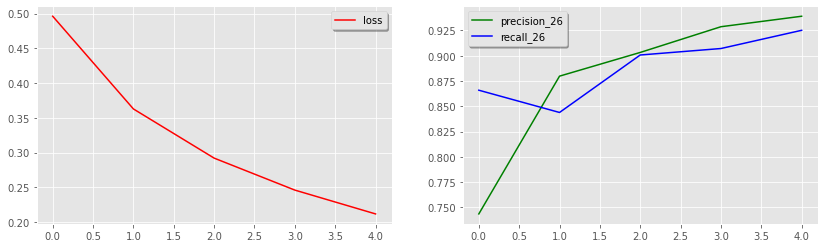

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
names = list(history.history.keys())

ax[0].plot(history.history[names[0]], color='r', label=names[0])
ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history[names[1]], color='g', label=names[1])
ax[1].plot(history.history[names[2]], color='b', label=names[2])
ax[1].legend(loc='best', shadow=True)

In [195]:
val_x = X_test
val_y = y_test

In [196]:
%%time
# Final evaluation of the model
scores = model.evaluate(val_x, val_y, verbose=0)
name = model.metrics_names
print(f'Shape of Training Batch: {X_train.shape}\nTraining record count: {X_train.shape[0]:,}')
print(f'Shape of Validation Batch: {val_x.shape}\nRecords being predicted on: \n  {val_x.shape[0]:,}')
print(f"Accuracies:\n  {name[0]} Score: {scores[0]:0.4f}\t {name[1]} Score:  {scores[1] * 100:0.4f}%\t {name[2]} Score:  {scores[2] * 100:0.4f}%\nTime:")

Shape of Training Batch: (4998, 68, 256, 1)
Training record count: 4,998
Shape of Validation Batch: (1000, 68, 256, 1)
Records being predicted on: 
  1,000
Accuracies:
  loss Score: 0.4129	 precision_26 Score:  83.9623%	 recall_26 Score:  89.0000%
Time:
CPU times: user 375 ms, sys: 53.2 ms, total: 428 ms
Wall time: 239 ms


In [197]:
%%time
predictions = model.predict(val_x)
pred_y = np.array([e for e in np.round(predictions.clip(0, 1).astype(float))])
real_score = sum([val == pred for val, pred in zip(val_y.tolist(), pred_y.tolist())]) / val_x.shape[0]
print(f'Validation using unseen data:\nRecords being predicted on: \n {val_x.shape[0]:,}\nReal prediction score: {real_score * 100:0.2f}%\nTime:')

Validation using unseen data:
Records being predicted on: 
 1,000
Real prediction score: 86.00%
Time:
CPU times: user 379 ms, sys: 29.2 ms, total: 408 ms
Wall time: 337 ms
